In [4]:
import numpy as np
import pandas as pd
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [5]:
dataset = pd.read_csv('diabetes.csv')
dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [6]:
dataset.shape

(768, 9)

In [91]:
dataset.describe

<bound method NDFrame.describe of      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627  

In [7]:
x = dataset.drop("Age" , axis = 1)
y = dataset["Age"]
print(x)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Outcome  
0                       0.627        1  
1                       0.351

In [8]:
print(y)

0      50
1      31
2      32
3      21
4      33
       ..
763    63
764    27
765    30
766    47
767    23
Name: Age, Length: 768, dtype: int64


In [9]:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.25 , random_state = 1)
print(x_train.shape)

(576, 8)


In [10]:
print(y_train.shape)

(576,)


In [11]:
print(x_test.shape)

(192, 8)


In [12]:
classifier = ElasticNet().fit(x_train,y_train)

In [13]:
classifier.intercept_

12.383321328094247

In [14]:
#model coefficients 

classifier.coef_

array([ 1.49535108,  0.08613973,  0.09720929, -0.07200145, -0.01021656,
        0.00615187,  0.        ,  0.        ])

In [15]:
classifier.coef_.shape

(8,)

In [18]:
#printing the r - squared
#printint the r- squared for training data
('the r-squred for training data', classifier.score(x_train, y_train)*100)

('the r-squred for training data', 35.76534789423985)

In [19]:
('the r-squred for test data', classifier.score(x_test, y_test)*100)

('the r-squred for test data', 37.70139590669196)

In [20]:
from sklearn.preprocessing import StandardScaler


In [22]:
#plotting the prediction error
from yellowbrick.regressor import PredictionError


C:\Users\vijaykumarj\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but ElasticNet was fitted with feature names
  warnings.warn(


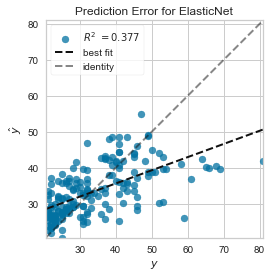

<AxesSubplot:title={'center':'Prediction Error for ElasticNet'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [24]:
visualizer = PredictionError(classifier)
visualizer.fit(x_train,y_train)
visualizer.score(x_test,y_test)
visualizer.poof()
                        

C:\Users\vijaykumarj\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but ElasticNet was fitted with feature names
  warnings.warn(


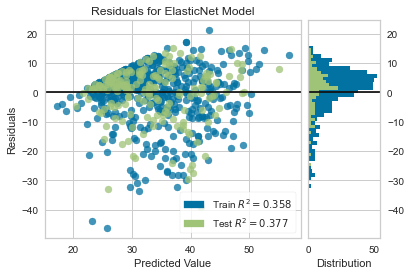

<AxesSubplot:title={'center':'Residuals for ElasticNet Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [25]:
from yellowbrick.regressor import ResidualsPlot
visualizer = ResidualsPlot(classifier)
visualizer.fit(x_train,y_train)
visualizer.score(x_test,y_test)
visualizer.poof()

In [26]:
#elastic net regression with several values of lambda
#setting the parameters
#Alphas
alphas = 10**np.linspace(10,100,10)*0.5
# Lambdas
i_min = 0.01
i_max = 0.2
i_num = 10

lambdas = np.linspace(i_min , i_max , i_num)
#prediction

pred_num = x.shape[1]

#coefficients

coef_a = np.zeros((i_num , pred_num))

#r squared
rsq_train = np.zeros(i_num)
rsq_test =  np.zeros(i_num)

#enumerating through lambdas with ind and i

for ind , i in enumerate(lambdas):
    classifier = ElasticNet(alpha = i).fit(x_train, y_train)
    coef_a[ind , :] = classifier.coef_
    rsq_train[ind] = classifier.score(x_train,y_train)
    rsq_test[ind] = classifier.score(x_test,y_test)


In [27]:
#plotting the r square as a function of lambda values
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\vijaykumarj\AppData\Local\Temp\ipykernel_13160\4279970892.py:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(rsq_train ,"bo-", label = r'$R^2$ Training dataset', color = 'blue', alpha = 0.6 , linewidth = 4 )
C:\Users\vijaykumarj\AppData\Local\Temp\ipykernel_13160\4279970892.py:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(rsq_test ,"bo-", label = r'$R^2$ Training dataset', color = 'green', alpha = 0.6 , linewidth = 4 )


Text(0.5, 0, 'lambda')

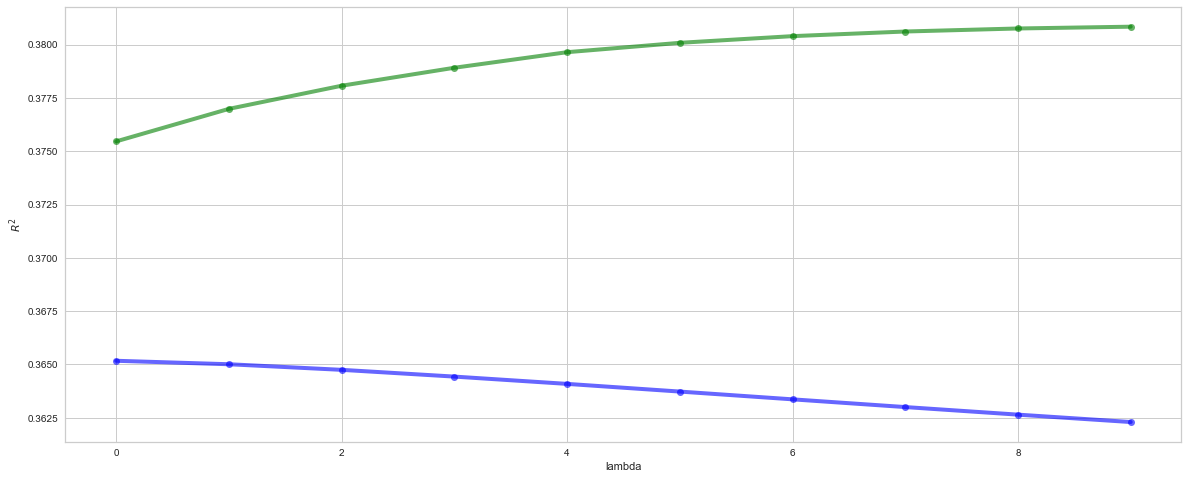

In [28]:
#plotting the r2

plt.figure(figsize = (20,8))
plt.plot(rsq_train ,"bo-", label = r'$R^2$ Training dataset', color = 'blue', alpha = 0.6 , linewidth = 4 )
plt.plot(rsq_test ,"bo-", label = r'$R^2$ Training dataset', color = 'green', alpha = 0.6 , linewidth = 4 )
plt.ylabel(r'$R^2$')
plt.xlabel("lambda")

In [29]:
#making prediction on testing data

y_pred = classifier.predict(x_test)
y_pred

array([38.76885428, 32.17852799, 34.64874697, 28.19424782, 27.35104673,
       26.71904592, 35.54939218, 27.50544871, 25.89712364, 22.82013327,
       40.54649764, 27.03701436, 32.20874237, 45.6555926 , 26.63481746,
       49.27693218, 27.8235474 , 36.173272  , 23.62103608, 31.79440997,
       34.39460707, 34.15223611, 56.34597221, 42.57308133, 25.22226637,
       38.5955234 , 28.45177377, 47.62297101, 27.20136032, 37.94373013,
       34.03098148, 29.60819687, 28.90676058, 27.81890598, 26.85635217,
       29.20226488, 26.78989207, 28.74653271, 38.37891281, 41.92461503,
       24.02245533, 24.4716706 , 26.54186173, 31.7362278 , 27.26791094,
       25.95660563, 29.96313095, 38.00560121, 25.78401105, 33.30415395,
       21.45054397, 30.01148433, 43.0995249 , 25.74055558, 45.23379446,
       29.0424627 , 30.17055748, 41.6809693 , 41.87879155, 31.73844157,
       32.57593716, 22.40665184, 37.4570728 , 27.23734063, 25.27676692,
       26.07450886, 26.54862743, 30.14762604, 48.70382714, 43.73

In [ ]:
#the r squared of the prediction


In [30]:
rsq_test = r2_score(y_test,y_pred)*100
rsq_test

38.08400061469717

In [31]:
from sklearn.metrics import mean_squared_error



In [32]:
#rmse on the testing data

rmse_test = np.sqrt(mean_squared_error(y_test,y_pred))
rmse_test


9.142849025028099

In [33]:
#the rmse on the training dataset
#predicting on the training data
y_predict_train = classifier.predict(x_train)


In [34]:
rmse_train = np.sqrt(mean_squared_error(y_train,y_predict_train))
rmse_train


9.418944407688462

In [35]:
#model tuning using elaticnetcv
from sklearn.linear_model import ElasticNetCV



In [36]:
#10 folds CV

Classifier_cv = ElasticNetCV(alphas = np.random.randint(0 ,100 ,10), cv = 10).fit(x_train,y_train)

In [37]:
#printing the scores

Classifier_cv.alphas

array([61, 50, 91, 39, 77,  1, 45, 99, 34, 28])

In [119]:
Classifier_cv

ElasticNetCV(alphas=array([73, 52,  6, 12, 93, 34, 82, 65, 47, 44]), cv=10)

In [38]:
Classifier_cv.alpha_

1

In [39]:
#creating a new model with optimum alpha
Classifier_tuned = ElasticNet().set_params(alpha = Classifier_cv.alpha_).fit(x_train,y_train)


In [40]:
#predicting on the testing data

y_pred_tune = Classifier_tuned.predict(x_test)

In [41]:
#computing the rmse

rmse_tuned = np.sqrt(mean_squared_error(y_test, y_pred_tune))

In [42]:
rmse_tuned

9.17105425227